In [2]:
# Install required libraries (for Colab)
!pip install pandas numpy scikit-learn tensorflow matplotlib seaborn

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Mount Google Drive (for Colab users)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Extract ZIP dataset (assuming CSV is inside)
import zipfile
zip_path = '/content/drive/MyDrive/character_dataset.zip'
extract_path = '/content/characterData'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")

Extraction complete!


In [7]:
import os
print(os.listdir(extract_path))

['emnist-byclass-mapping.txt', 'emnist-digits-train.csv', 'emnist-letters-mapping.txt', 'emnist-bymerge-mapping.txt', 'emnist-byclass-train.csv', 'emnist-balanced-train.csv', 'emnist-bymerge-test.csv', 'emnist-balanced-mapping.txt', 'emnist-digits-mapping.txt', 'emnist-bymerge-train.csv', 'emnist_source_files', 'emnist-letters-test.csv', 'emnist-mnist-mapping.txt', 'emnist-mnist-train.csv', 'emnist-digits-test.csv', 'emnist-letters-train.csv', 'emnist-byclass-test.csv', 'emnist-balanced-test.csv', 'emnist-mnist-test.csv']


In [22]:
# Load dataset (assuming CSV file inside extracted folder)
df = pd.read_csv('/content/characterData/emnist-digits-train.csv')
  # Adjust file name if different

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Split features and labels
y = df.iloc[:, 0].values  # labels
X = df.iloc[:, 1:].values  # pixel values

In [17]:
# Encode labels and preprocess images
le = LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_
num_classes = len(class_names)

X = X / 255.0
X = X.reshape(-1, 28, 28, 1)

y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 237s 39ms/step - accuracy: 0.9334 - loss: 0.2181 - val_accuracy: 0.9916 - val_loss: 0.0303
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 252s 37ms/step - accuracy: 0.9877 - loss: 0.0444 - val_accuracy: 0.9934 - val_loss: 0.0236
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 268s 38ms/step - accuracy: 0.9911 - loss: 0.0324 - val_accuracy: 0.9941 - val_loss: 0.0225
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 217s 36ms/step - accuracy: 0.9930 - loss: 0.0255 - val_accuracy: 0.9936 - val_loss: 0.0251
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 266s 37ms/step - accuracy: 0.9937 - loss: 0.0231 - val_accuracy: 0.9943 - val_loss: 0.0223
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 262s 37ms/step - accuracy: 0.9942 - loss: 0.0210 - val_accuracy: 0.9944 - val_loss: 0.0222
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 270s 38ms/step - accuracy: 0.9947 - loss: 0.0186 - val_accuracy: 0.9943 - val_loss: 0.0234
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 256s 37ms/step - accuracy: 

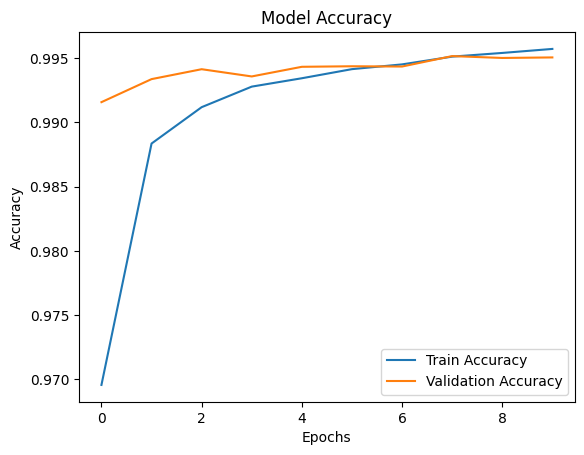

In [20]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import classification_report

# Predictions
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Ensure class names are all strings
class_names_list = [str(label) for label in le.inverse_transform(range(len(le.classes_)))]

# Print classification report
print(classification_report(y_true, y_pred_labels, target_names=class_names_list))


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       1.00      1.00      1.00      4815
           2       0.99      1.00      0.99      4928
           3       1.00      0.99      0.99      4850
           4       1.00      0.99      1.00      4682
           5       0.99      1.00      1.00      4734
           6       1.00      1.00      1.00      4864
           7       0.99      1.00      1.00      4770
           8       1.00      0.99      0.99      4831
           9       0.99      0.99      0.99      4779

    accuracy                           1.00     48000
   macro avg       1.00      1.00      1.00     48000
weighted avg       1.00      1.00      1.00     48000

